# Problem Set 1

Your Name:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.datasets

# We use 'breast_cancer' data for classification analysis.

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [3]:
print (breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
print (breast_cancer.feature_names, len(breast_cancer.feature_names))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 30


In [5]:
print (breast_cancer.target_names)

['malignant' 'benign']


Text(0, 0.5, 'mean radius')

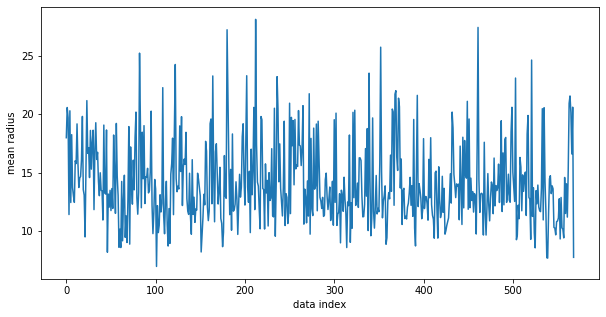

In [6]:
# An example plot of 'mean radius', the first feature in breast cancer data
fid = 0
feat0 = breast_cancer.data[:,fid]
plt.figure(figsize=(10,5))
plt.plot(feat0)
plt.xlabel('data index')
plt.ylabel(breast_cancer.feature_names[fid])

## Two features
We will use the following two data columns only, corresponding to 'worst compactness' and 'mean concave points'.

In [7]:
f1_name = 'worst compactness'
f2_name = 'mean concave points'
print (f1_name in breast_cancer.feature_names, f2_name in breast_cancer.feature_names)

True True


## 1. Extract two data columns corresponding to the two feature names.
- From `breast_cancer`, extract the the columns.
- Name them as `feat1` and `feat2`
- then plot the two features

In [8]:
# your code here
# feat1
# feat2
# I choose to use pandas
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
feat1 = df[f1_name].to_numpy()
feat2 = df[f2_name].to_numpy()

Text(0.5, 1.0, 'worst compactness')

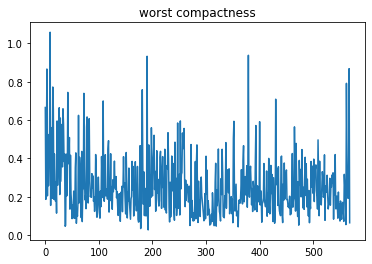

In [9]:
plt.plot(feat1)
plt.title(f1_name)

Text(0.5, 1.0, 'mean concave points')

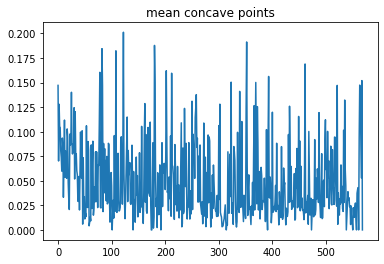

In [10]:
plt.plot(feat2)
plt.title(f2_name)

## 2. Plot histograms for the two features. One for each.
- use 'bins=50' or more

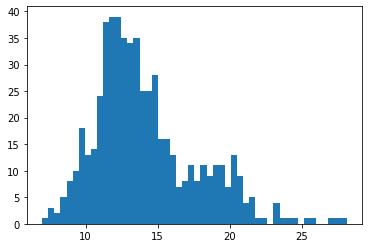

In [11]:
# an example with feat0
_ = plt.hist(feat0, bins=50)

Text(0.5, 1.0, 'worst compactness histogram')

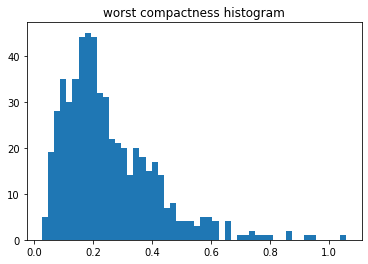

In [12]:
# your code here
_ = plt.hist(feat1, bins=50)
plt.title(f1_name + ' histogram')

Text(0.5, 1.0, 'worst compactnesshistogram')

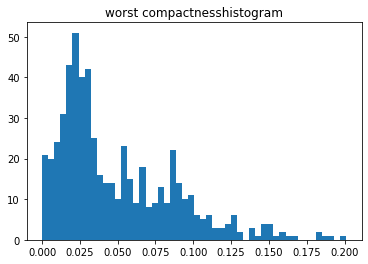

In [13]:
_ = plt.hist(feat2, bins=50)
plt.title(f1_name + 'histogram')

## 3. Benign or Malignant?
- Draw a **scatter plot** in which the data points of malignant are shown by red dots and the data of benign are shown by green dots.
- Use `alpha=0.3` to make the overlapping points visible.

In [14]:
print (breast_cancer.target_names)

['malignant' 'benign']


/home/yndk/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


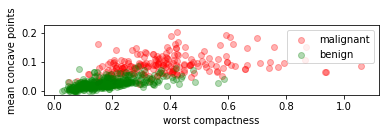

In [15]:
# your code here
mal = breast_cancer.target == 0
ben = breast_cancer.target == 1
colors = ['r', 'g']
for i, sel in zip([0,1], [mal, ben]):
    plt.scatter (feat1[sel], feat2[sel], color=colors[i], alpha=0.3, label=breast_cancer.target_names[i])
plt.xlabel(f1_name)
plt.ylabel(f2_name)
plt.legend()
plt.axes().set_aspect('equal')

## 4. Nearest Center Classification.
4.1 Compute the two center points for benign and malignant.

4.2 Given feature points below, provide the result of classification using the nearest-center method.
- [0.2, 0.02]
- [0.7, 0.12]
- [0.3, 0.06]

In [16]:
# your code here
centers=[]
for sel in [mal, ben]:
    centers.append( [feat1[sel].mean(), feat2[sel].mean()])
centers = np.array(centers)
for i in range(2):
    print (f'{breast_cancer.target_names[i]} : {centers[i]}')

malignant : [0.3748241 0.08799  ]
benign : [0.18267255 0.02571741]


In [17]:
def distance(a, b):
    #print ('distance: ', a, b)
    d = np.sqrt(np.power(a[0] - b[0], 2) + np.power(a[1] - b[1], 2))
    return d

def classify(p, centers):
    dist1 = distance (p, centers[0])
    dist2 = distance (p, centers[1])
    re = 0 if dist1 < dist2 else 1
    #print ('classify: ', dist1, dist2, re, breast_cancer.target_names[re])
    return re
#
# case 1
p = np.array([ [0.2, 0.02], [0.7, 0.12], [0.3, 0.06], [0.2, 0.2] ])
#print(p)
kre = []
for i in range(p.shape[0]):
    k = classify (p[i], centers)
    print (f'Case {i+1} belongs to ', breast_cancer.target_names[k])
    kre.append(k)
#
print(kre)

Case 1 belongs to  benign
Case 2 belongs to  malignant
Case 3 belongs to  malignant
Case 4 belongs to  benign
[1, 0, 0, 1]


/home/yndk/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


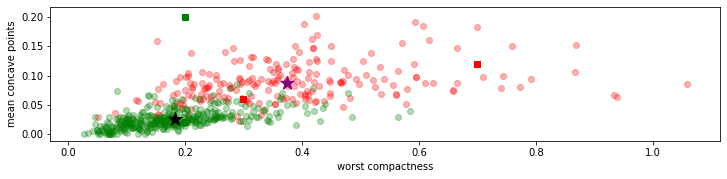

In [18]:
# extra
plt.figure(figsize=(12,10))
for c, sel in zip(['r', 'g'], [mal, ben]):
    plt.scatter (feat1[sel], feat2[sel], color=c, alpha=0.3)
plt.xlabel(f1_name)
plt.ylabel(f2_name)

i=0; plt.scatter (centers[i,0], centers[i,1], color='purple', marker='*', s=200)
i=1; plt.scatter (centers[i,0], centers[i,1], color='black', marker='*', s=200)

colors = ['r', 'g']
for i in range(len(kre)):
    plt.scatter(p[i,0], p[i,1], color=colors[kre[i]], marker='s')
plt.axes().set_aspect('equal')

## 5. Classification Map
- Using `plt.scatter()`, draw a classification map (on the scatter plot you drew above) to visualize how the feature space is divided into two areas of malignant and benign.
- For map drawing, you need to choose appropriate interval for each of the two features.
- Use square marker (`marker='s'`).

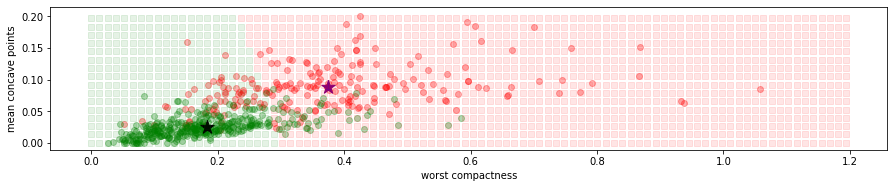

In [19]:
# your code here
fig, axis = plt.subplots(1,1,figsize=(15,15))
for c, sel in zip(['r', 'g'], [mal, ben]):
    axis.scatter (feat1[sel], feat2[sel], color=c, alpha=0.3)
axis.set_xlabel(f1_name)
axis.set_ylabel(f2_name)

i=0; axis.scatter (centers[i,0], centers[i,1], color='purple', marker='*', s=200)
i=1; axis.scatter (centers[i,0], centers[i,1], color='black', marker='*', s=200)

colors = ['r', 'g']
stepy = 0.21 / 16
for f1 in np.arange(0.0, 1.2, step=stepy): # feat1
    for f2 in np.arange(0.0, 0.21, step=stepy): # feat2
        k = classify(np.array([f1, f2]), centers)
        axis.scatter(f1, f2, marker='s', color=colors[k], alpha=0.1)
axis.set_aspect(1)

## 6. Sample Covariance Matrix
- Compute the sample covariance matrix for each of the targets (malignant and benign). 
- The two covariance matrices are of $2\times2$.

In [20]:
# your code here
def Covariance(f1, f2, m):
    #print (m, f1, f2)
    S = np.zeros((2,2))
    for i in range(f1.shape[0]):
        a, b = f1[i] - m[0], f2[i] - m[1]
        S[0,0] += a*a
        S[1,1] += b*b
        S[1,0] += a*b
        S[0,1] += a*b
    S = S / (f1.shape[0] - 1)
    return S

Smal = Covariance(feat1[mal], feat2[mal], centers[0])
Sben = Covariance(feat1[ben], feat2[ben], centers[1])
print(f'Cov_mal = {Smal}')
print(f'Cov_ben = {Sben}')
S = np.array( [Smal, Sben])
print ('S = ', S)

Cov_mal = [[0.02902661 0.00204008]
 [0.00204008 0.00118157]]
Cov_ben = [[0.00849715 0.00082156]
 [0.00082156 0.00025309]]
S =  [[[0.02902661 0.00204008]
  [0.00204008 0.00118157]]

 [[0.00849715 0.00082156]
  [0.00082156 0.00025309]]]


## 7. Two-Dimensinal Gaussian Probability Density
1. The sample center and sample covariance matrix for each target allows us to adopt a 2D Gaussian distribution to model the feature data. Let $p_m(x)$ denote the empirical pdf for malignant and $p_b(x)$ for benign, where $x$ is a 2D feature vector.
2. For each of the following features, compute the two function values $p_m(x)$ and $p_b(x)$:
    - $x=[0.2, 0.02]$
    - $x=[0.7, 0.12]$
    - $x=[0.3, 0.06]$

In [29]:
# your code here
import scipy.stats
import numpy as np

def GaussianPDF2D(x, cov, m):
    pdf = scipy.stats.multivariate_normal.pdf(x, m, cov)
    f = np.exp(-0.5*(x-m).dot( np.linalg.inv(cov).dot(x-m) )) / np.sqrt(np.power(2*np.pi, 2) * np.linalg.det(cov))
#     print (pdf, f)
#     print (cov, m)
    return pdf

X = np.array( [ [0.2, 0.02], [0.7, 0.12], [0.3, 0.06]])
for x in X:
    p0 = GaussianPDF2D(x, S[0], centers[0])
    p1 = GaussianPDF2D(x, S[1], centers[1])
    print (f'--- pdf({x}): p_m(x) = {p0:.3e},   p_b(x) = {p1:.2e}')

--- pdf([0.2  0.02]): p_m(x) = 3.843e+00,   p_b(x) = 1.10e+02
--- pdf([0.7  0.12]): p_m(x) = 4.505e+00,   p_b(x) = 6.73e-08
--- pdf([0.3  0.06]): p_m(x) = 2.053e+01,   p_b(x) = 1.28e+01


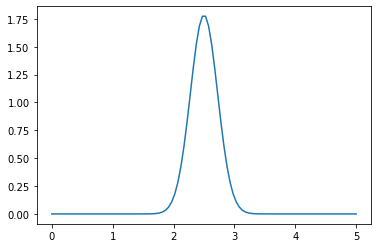

In [30]:
# example, 1D case
from scipy.stats import multivariate_normal
x = np.linspace(0, 5, 100)
y = multivariate_normal.pdf(x, mean=2.5, cov=0.05)
plt.plot(x, y)

---
## For Problems 8 ~ 10
---
**[You must provide a verval explanation for these problems in addition to numerical computation results. Briefly write down how and why you reach at your solution for each problem.]**

A survey is conducted in a large office building. It is found that 25% of the office workers weigh less than 50kg and that 30% of the office workers weigh more than 80kg.

The weights of the office workers may be modelled by a normal distribution with mean $m$ and standard deviation $s$.

## 8. Parameters of Gaussian
1. Determine two simultaneous linear equations satisfied by $m$ and $s$.
2. Compute the values of $m$ and $s$

In [23]:
# your code here

For normal (Gaussian) distribution,
$$ 
\mathrm{Prob}[ X < (m-50)/s] = 0.25
$$
means
$(m-50)/s$ = `scipy.stats.norm.ppf(.25)`. So we have
$$
    m - m_1 = s \times \mathrm{ppf}(p_1) \quad p_1 = 0.25, m_1 = 25\\
    m - m_2 = s \times (1 - \mathrm{ppf}(p_2)) \quad p_2 = 0.30, m_2 = 80
$$
from which closed form solutions for $m$ and $s$ are given
$$
    s = \frac{-m_2 + m_1}{1 - \mathrm{ppf}{p_2} - \mathrm{ppf}(p_1)} \\
$$

In [33]:
#plow = ()
m1 = 50
m2 = 80
p1 = scipy.stats.norm.ppf(.25)
p2 = scipy.stats.norm.ppf(.3)
s = ()

## 9. Probability Calculation I
- Find the probability that an office worker weighs more than 90kg.

In [24]:
# your code here

## 10. Probability Calculation II
There are elevators in the office building that take the office workers to their offices.    Given that there are 10 workers in a particular elevator, find the probability that at least four of the workers weigh more than 70kg.

In [25]:
# your code here

## 11. Public data and where to apply classification.
1. Visit one of the following web sites and try to find a dataset for which you want to apply a classification algorithm.
    - You must provide the web link of your choice and a short description.
2. Explain why you chose it and why it is beneficial or meaningful. You may choose to use 한글 or English.

- https://www.data.go.kr/
- https://data.europa.eu/euodp/en/home
- https://www.data.gov/

#### Your proposal here



# END